# Naive Bayes classifier



A Naive Bayes classifier is a probabilistic machine learning model that is widely used for classification tasks, particularly in natural language processing (NLP) and text classification, spam detection, sentiment analysis, and more. It is based on Bayes' theorem and makes a "naive" assumption about the independence of features. Despite its simplifying assumption, Naive Bayes often performs surprisingly well in practice.


## Discriminative vs generative models

A **discriminative model** learns posterior distribution $p(y \vert \boldsymbol x, \boldsymbol w)$. Example: logistic regression model

$$
\mathbb P(y=1  \vert \boldsymbol x, \boldsymbol w) = \sigma(\boldsymbol x^\intercal \boldsymbol w), \quad 
\mathbb P(y=0  \vert \boldsymbol x, \boldsymbol w) =  1 - \sigma(\boldsymbol x^\intercal \boldsymbol w)
$$

A **generative model** estimates joint distribution 

$$
p(\boldsymbol x, y) = p(\boldsymbol x \vert y) p(y).
$$

## Bayesian classifier

For classification use Bayes theorem:

$$
    \mathbb P(y = k \vert \boldsymbol x) = \frac{p(\boldsymbol x \vert y = k) \mathbb P(y = k)}{\sum\limits_{j=1}^K p(\boldsymbol x \vert y = j) \mathbb P(y = j)}
$$


**Bayesian classifier** maximizes this expression:

$$
    \widehat y = \arg\max\limits_{1\leqslant j \leqslant K} p(\boldsymbol x \vert y = j) \mathbb P(y = j)
$$

How to estimate $\mathbb P(y = k)$ and $p(\boldsymbol x \vert y = k)$ given a training dataset $(\boldsymbol X, \boldsymbol y)$?

* To esimatate $\mathbb P(y = k)$ we can use frequencies:

    $$
        \widehat y_k = \frac 1n \sum\limits_{i=1}^n \mathbb I[y_i = k]
    $$

* Estimation of density $p(\boldsymbol x \vert y = k)$ is much harder task. It can be solved via
    * parametric density estimation
    * nonparametric density estimation
    * mixture of distributions

    (see [Vorontsov's slides](http://www.machinelearning.ru/wiki/images/e/e9/Voron-ML-BTC-slides.pdf) for details)

Special cases of parametric density estimation:

* **Quadratic discriminant analysis** (QDA):
    
    $$
        p(\boldsymbol x \vert y = k) = \mathcal N(\boldsymbol x \vert \boldsymbol \mu_k, \boldsymbol \Sigma_k) = \frac {\exp\big(-\frac 12(\boldsymbol x - \boldsymbol \mu_k)^\intercal \boldsymbol \Sigma_k^{-1} (\boldsymbol x - \boldsymbol \mu_k)\big)}{\sqrt{(2\pi)^n \det \boldsymbol \Sigma_k}}
    $$

* **Linear discriminant analysis** (LDA): the covariance matrix $\boldsymbol \Sigma$ is the same for all classes, and it's MLE estimation is

    $$
        \widehat \Sigma = \frac 1n\sum\limits_{i=1}^n (\boldsymbol x_i - \boldsymbol{\widehat \mu}_{y_i})(\boldsymbol x_i - \boldsymbol{\widehat \mu}_{y_i})^\intercal 
    $$

### Naive Bayes estimation

**Naive assumption**: all feature, conditioned on target, are independent:

$$
    p(\boldsymbol x \vert y) = p(x_1, \ldots, x_d \vert y) = \prod\limits_{j=1}^d p(x_j \vert y)
$$

To estimate 1-d densities $p(x_j \vert y)$ is much easier than multivariate ones. The output of the Bayesian classifier is given by

$$
    \arg\max\limits_{1\leqslant k \leqslant K}\big(\log \widehat y_k + \sum\limits_{j=1}^d \log \widehat p_j(x_j \vert y = k)\big)
$$

In [2]:
import pandas as pd

tennis = pd.read_csv("PlayTennis.csv")
tennis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
tennis[tennis["Play Tennis"] == "Yes"]

,Outlook,Temperature,Humidity,Wind,Play Tennis
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


In [4]:
tennis[tennis["Play Tennis"] == "No"]

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
5,Rain,Cool,Normal,Strong,No
7,Sunny,Mild,High,Weak,No
13,Rain,Mild,High,Strong,No


Let 

$$
    \boldsymbol x = (\mathrm{Sunny}, \mathrm{Cool}, \mathrm{High}, \mathrm{Strong})
$$

Calculate $\mathbb P(\boldsymbol x\vert \mathrm{Yes})$ and $\mathbb P(\boldsymbol x\vert \mathrm{No})$. What is the prediction $\widehat y$ for the sample $\boldsymbol x$?

## Example: MNIST

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'svg'

X, Y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

X = X.astype(float).values / 255
Y = Y.astype(int).values

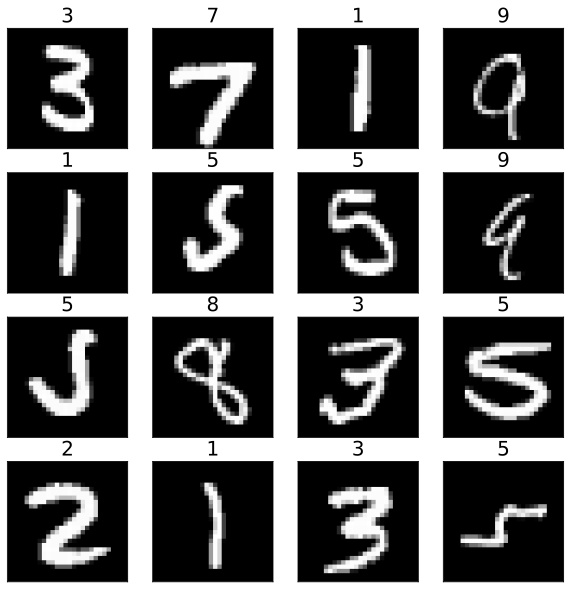

In [10]:
def plot_digits(X, y_true, y_pred=None, n=4, random_state=123):
    np.random.seed(random_state)
    indices = np.random.choice(np.arange(X.shape[0]), size=n*n, replace=False)
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        # plt.imshow(train_images[i], cmap=plt.cm.binary)
        if y_pred is None:
            title = str(y_true[indices[i]])
        else:
            title = f"y={y_true[indices[i]]}, ŷ={y_pred[indices[i]]}"
        plt.title(title, size=20)
    plt.show()

plot_digits(X, Y, random_state=12)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=10000)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [13]:
y_hat = gnb.predict(X_test)
y_hat

array([8, 9, 4, ..., 6, 8, 3])

In [14]:
print("Accuracy:", accuracy_score(y_test, y_hat))

Accuracy: 0.5627


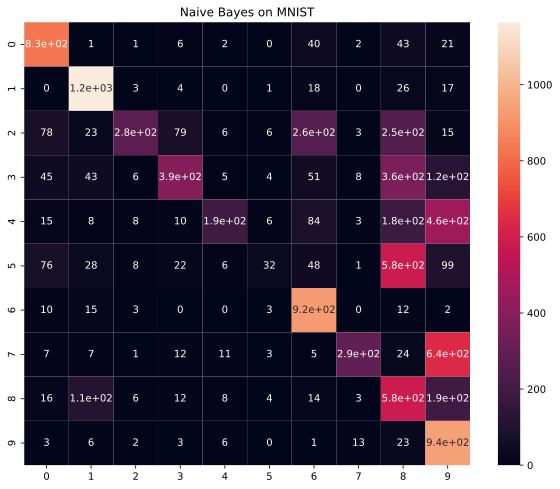

In [16]:
plt.figure(figsize=(10, 8))
plt.title("Naive Bayes on MNIST")
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True);

1. **Bayes' Theorem.**

Naive Bayes is based on Bayes' theorem, which is a fundamental theorem in probability theory. It relates the conditional probability of an event A given an event B to the conditional probability of event B given event A. In the context of classification:

$$P(y|X) = \frac{P(X)}{P(X|y) \cdot P(y)}$$

Where: 

* $P(y|X)$ is the probability of class y given the features X;
* $P(X|y)$ is the likelihood, the probability of observing features X given class y;
* $P(y)$ is the prior probability of class y;
* $P(X)$ is the evidence, the probability of observing the features X.

2. **Conditional Independence**

The "naive" assumption made by Naive Bayes is that all features are conditionally independent given the class label. In other words, the presence or absence of one feature does not affect the presence or absence of any other feature. This simplifies the calculation of the likelihood, making the model computationally tractable.

## Types of Naive Bayes Classifiers

1. <h4>Multinomial Naive Bayes. </h4>
This variant is commonly used for text classification, where features represent word counts or frequencies. It's suitable for tasks like document classification and spam detection.

2. <h4>Gaussian Naive Bayes. </h4>
It assumes that features follow a Gaussian (normal) distribution. It's used for continuous data, such as numerical measurements.

3. <h4>Bernoulli Naive Bayes. </h4>
This variant is designed for binary feature data, where features are either present (1) or absent (0). It's suitable for text data represented as binary vectors.


<h4>Advantages</h4>

* Simplicity and speed: Naive Bayes is computationally efficient and can handle high-dimensional data;
* Works well with small datasets;
* Often performs surprisingly well, especially in text classification tasks;
* Provides probabilities, allowing for probabilistic predictions.

<h4>Limitations</h4>

* The "naive" assumption of feature independence may not hold in many real-world scenarios;
* It can be sensitive to irrelevant features;
* It doesn't handle missing data well.



Naive Bayes classifiers are widely used as a baseline model in many classification problems due to their simplicity and effectiveness, especially when working with text data. However, they may not be the best choice for every problem, and more complex models like decision trees, random forests, or neural networks may provide better accuracy in some cases.

## Python implementations of the models

###  Multinomial Naive Bayes
Here's an example of how to implement a Multinomial Naive Bayes classifier in Python using scikit-learn. In this example, we'll use the famous "20 Newsgroups" dataset for text classification, where the task is to classify news articles into one of 20 different categories.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)

# Create a pipeline for text classification with Multinomial Naive Bayes
text_clf = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to a bag-of-words representation
    ('tfidf', TfidfTransformer()),  # Convert raw frequency counts to TF-IDF values
    ('clf', MultinomialNB())  # Multinomial Naive Bayes classifier
])

# Fit the model on the training data
text_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = text_clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In this code:

1. We load the 20 Newsgroups dataset and split it into training and testing sets.

2. We create a pipeline for text classification, which includes text preprocessing steps like converting text to a bag-of-words representation and then to TF-IDF (Term Frequency-Inverse Document Frequency) values.

3. We use the Multinomial Naive Bayes classifier from scikit-learn (MultinomialNB) as the final step in the pipeline.

4. We fit the model on the training data and make predictions on the test data.

5. Finally, we evaluate the model's accuracy on the test data.

You can adapt this code to your own text classification problem by replacing the dataset and making any necessary adjustments to the text preprocessing steps.

##### Gaussian Naive Bayes classifier

Here's an example of how to implement a Gaussian Naive Bayes classifier in Python using scikit-learn. Gaussian Naive Bayes is typically used for classification problems where the features are continuous and assumed to follow a Gaussian (normal) distribution.

In this example, we'll use the Iris dataset, which is a commonly used dataset for classification tasks:

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In this code:

1. We load the Iris dataset using load_iris from scikit-learn.

2. We split the dataset into training and testing sets.

3. We create a Gaussian Naive Bayes classifier using GaussianNB.

4. We fit the model on the training data.

5. We make predictions on the test data and evaluate the model's accuracy.

This example demonstrates how to use Gaussian Naive Bayes for a simple classification problem. You can adapt this code to your own classification tasks with continuous features that are assumed to follow a Gaussian distribution.

##### Bernoulli Naive Bayes classifier


Here's an example of how to implement a Bernoulli Naive Bayes classifier in Python using scikit-learn. Bernoulli Naive Bayes is typically used for binary classification tasks where features are binary, representing the presence or absence of certain attributes.

In this example, we'll use a synthetic dataset for binary classification:

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Fit the model on the training data
bnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bnb.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In this code:

1. We generate a synthetic binary classification dataset using make_classification from scikit-learn. You can replace this with your own dataset.

2. We split the dataset into training and testing sets.

3. We create a Bernoulli Naive Bayes classifier using BernoulliNB.

4. We fit the model on the training data.

5. We make predictions on the test data and evaluate the model's accuracy.

This example demonstrates how to use Bernoulli Naive Bayes for a binary classification problem with binary features. You can adapt this code to your own binary classification tasks.